# ARIMA Analysis

            date_ymd  click_count
date                             
2019-01-01  20190101        19712
2019-01-02  20190102        22632
2019-01-03  20190103        22579
2019-01-04  20190104        20716
2019-01-05  20190105        21953


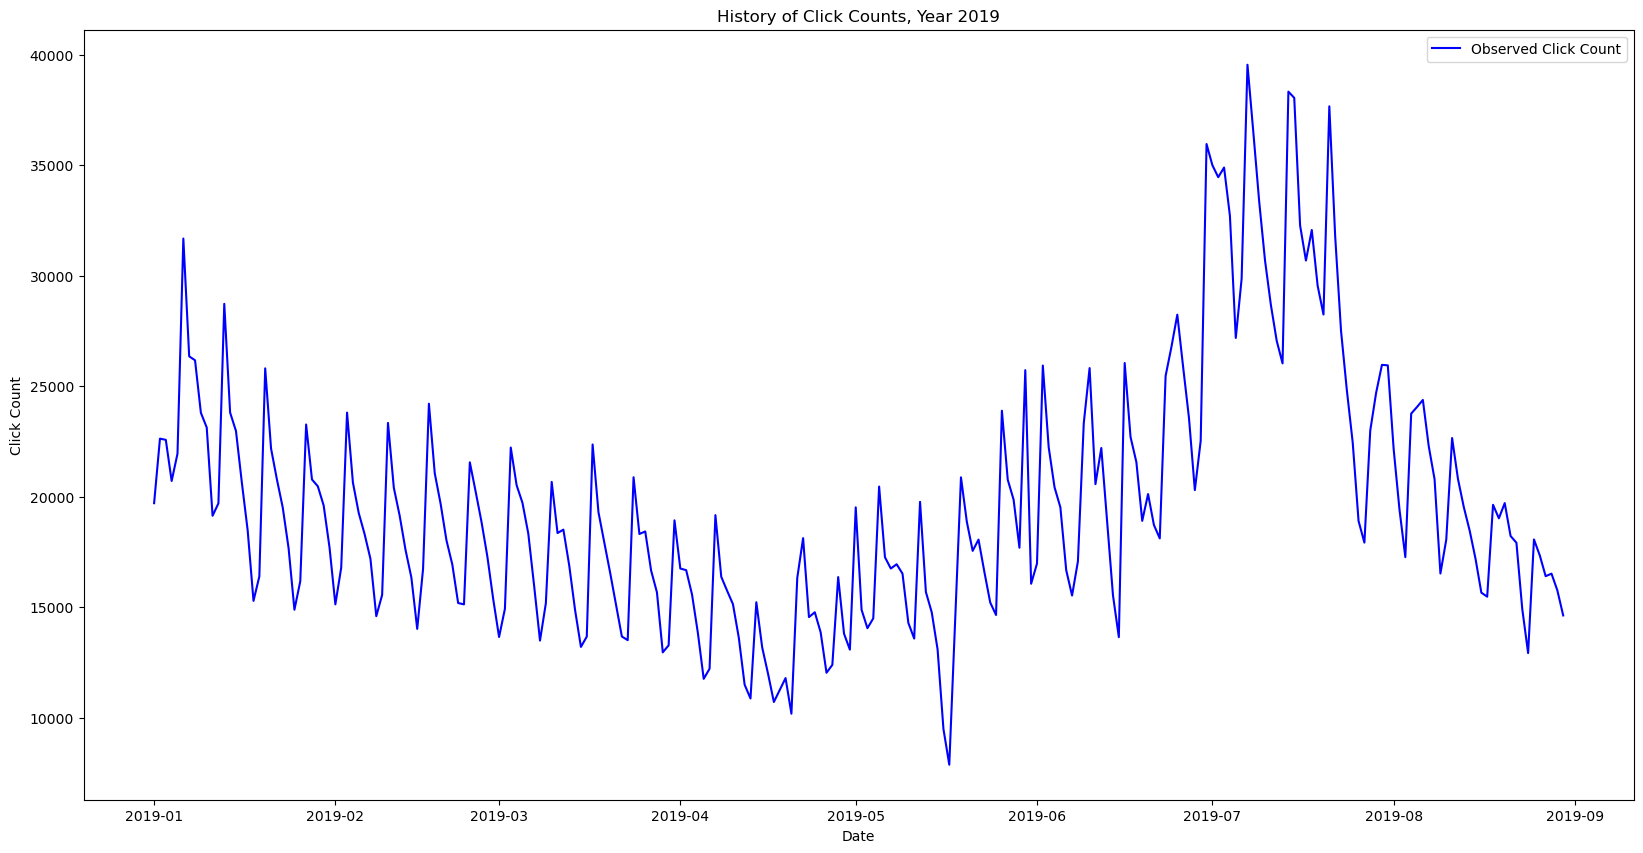

                               SARIMAX Results                                
Dep. Variable:            click_count   No. Observations:                  242
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2302.738
Date:                Mon, 28 Apr 2025   AIC                           4611.476
Time:                        23:11:45   BIC                           4621.930
Sample:                    01-01-2019   HQIC                          4615.688
                         - 08-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5038      0.106      4.733      0.000       0.295       0.712
ma.L1         -0.8489      0.070    -12.147      0.000      -0.986      -0.712
sigma2      1.258e+07      1e+06     12.578      0.0

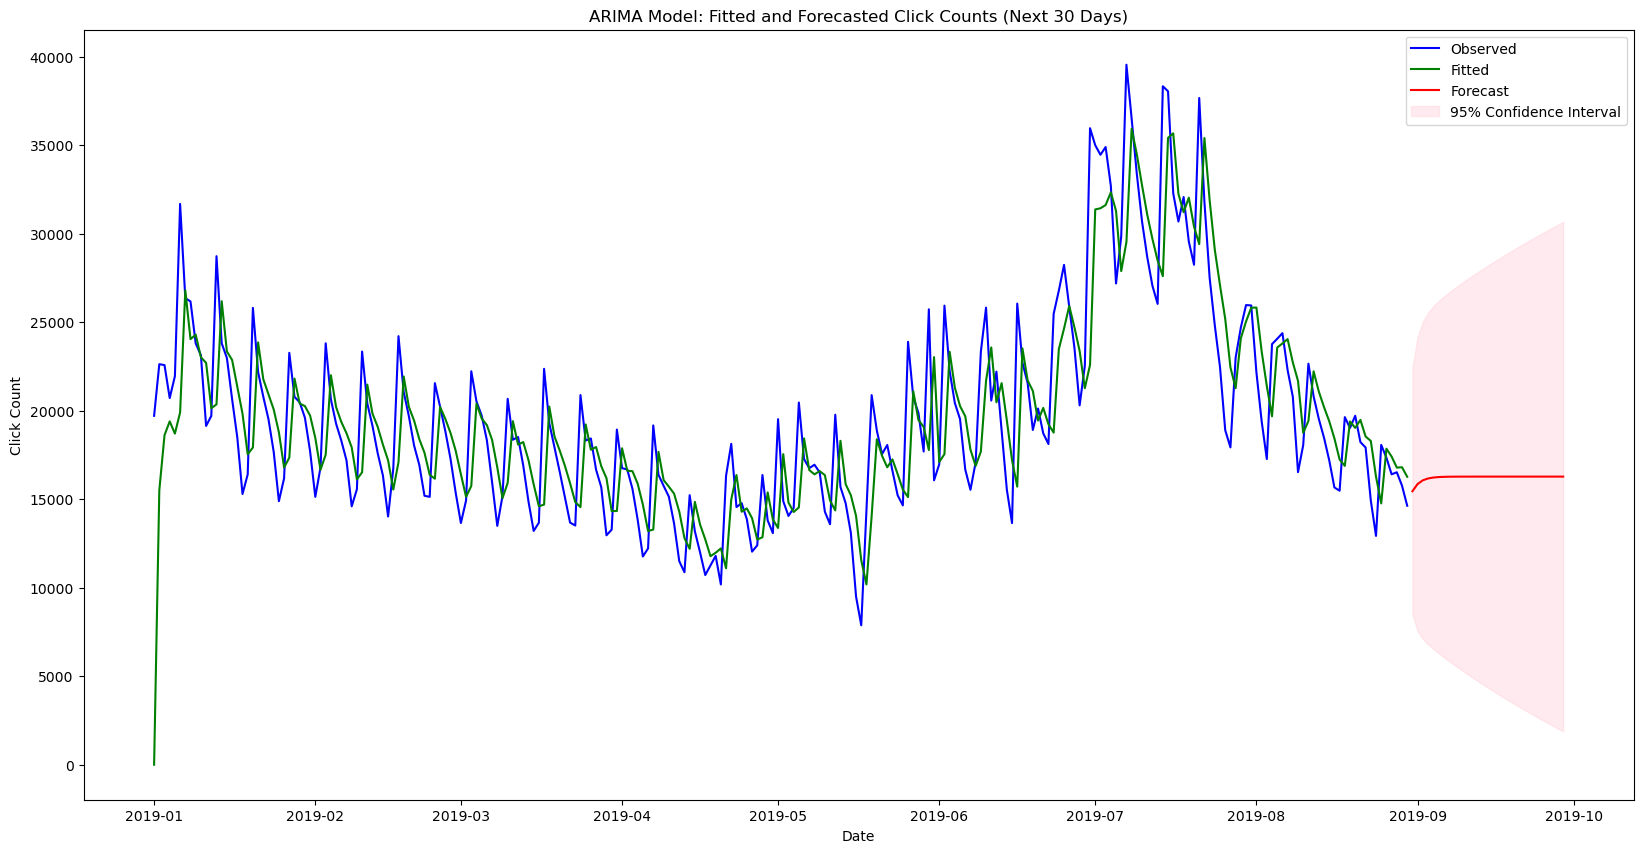

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import warnings
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")  # Ignore warnings for clearer output

# Load the data (adjust the file path if needed)
file_path_1 = "clicks.csv"
clicks = pd.read_csv(file_path_1)

# Convert 'date_ymd' to datetime and set as index
clicks['date'] = pd.to_datetime(clicks['date_ymd'], format='%Y%m%d')
clicks.set_index('date', inplace=True)

# Quick look at the data
print(clicks.head())

# Plot the observed click counts
plt.figure(figsize=(20,10))
plt.plot(clicks.index, clicks['click_count'], label='Observed Click Count', color='blue')
plt.xlabel("Date")
plt.ylabel("Click Count")
plt.title("History of Click Counts, Year 2019")
plt.legend()
plt.show()

# Fit the ARIMA model (order can be adjusted based on diagnostics)
order = (1, 1, 1)
arima_model = ARIMA(clicks['click_count'], order=order)
arima_result = arima_model.fit()
print(arima_result.summary())

# Generate in-sample fitted values and add them to the DataFrame (for the observed period)
clicks['fitted'] = arima_result.fittedvalues

# Forecast for the next 30 days
forecast_steps = 30
forecast_object = arima_result.get_forecast(steps=forecast_steps)
forecast_df = forecast_object.summary_frame(alpha=0.05)  # 95% confidence interval

# Create a datetime index for the forecast period assuming daily frequency
last_date = clicks.index[-1]
forecast_dates = pd.date_range(start=last_date + dt.timedelta(days=1), periods=forecast_steps, freq='D')

# Set the datetime index to the forecast DataFrame
forecast_df.index = forecast_dates

# Plot observed values, fitted in-sample values, and forecasted values
plt.figure(figsize=(20,10))
plt.plot(clicks.index, clicks['click_count'], label='Observed', color='blue')
plt.plot(clicks.index, clicks['fitted'], label='Fitted', color='green')
plt.plot(forecast_df.index, forecast_df['mean'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, 
                 forecast_df['mean_ci_lower'], 
                 forecast_df['mean_ci_upper'],
                 color='pink', 
                 alpha=0.3, 
                 label='95% Confidence Interval')
plt.xlabel("Date")
plt.ylabel("Click Count")
plt.title("ARIMA Model: Fitted and Forecasted Click Counts (Next 30 Days)")
plt.legend()
plt.show()


# SARIMA Analysis

            date_ymd  click_count
date                             
2019-01-01  20190101        19712
2019-01-02  20190102        22632
2019-01-03  20190103        22579
2019-01-04  20190104        20716
2019-01-05  20190105        21953


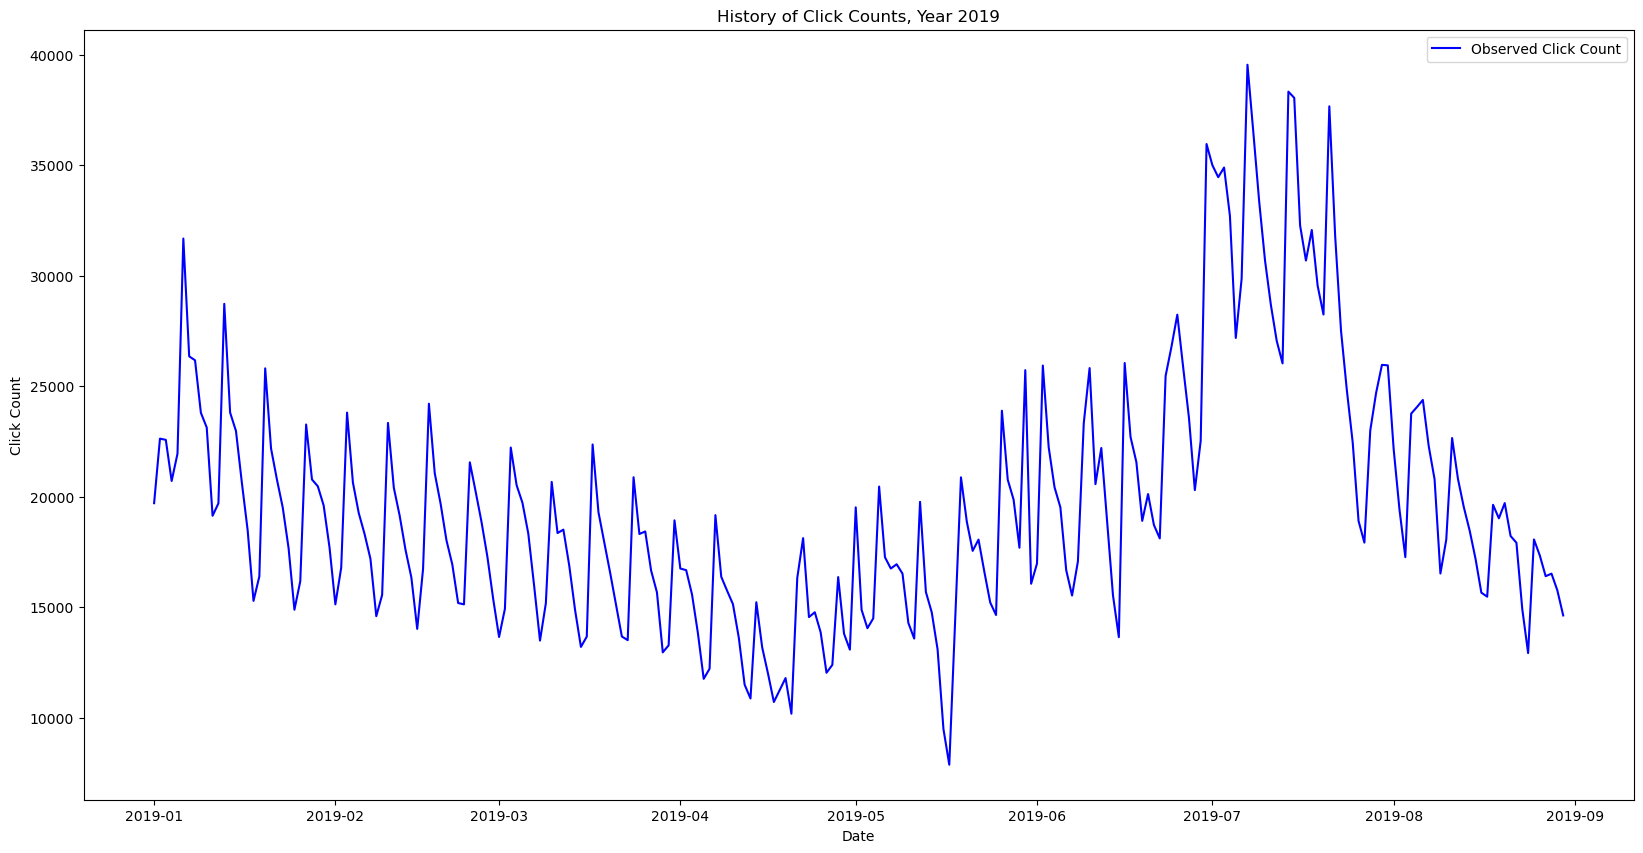

                                     SARIMAX Results                                     
Dep. Variable:                       click_count   No. Observations:                  242
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -2112.804
Date:                           Mon, 28 Apr 2025   AIC                           4235.609
Time:                                   23:11:46   BIC                           4252.885
Sample:                               01-01-2019   HQIC                          4242.575
                                    - 08-30-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8267      0.131     -6.293      0.000      -1.084      -0.569
ma.L1          0.7354      0.153      4.798

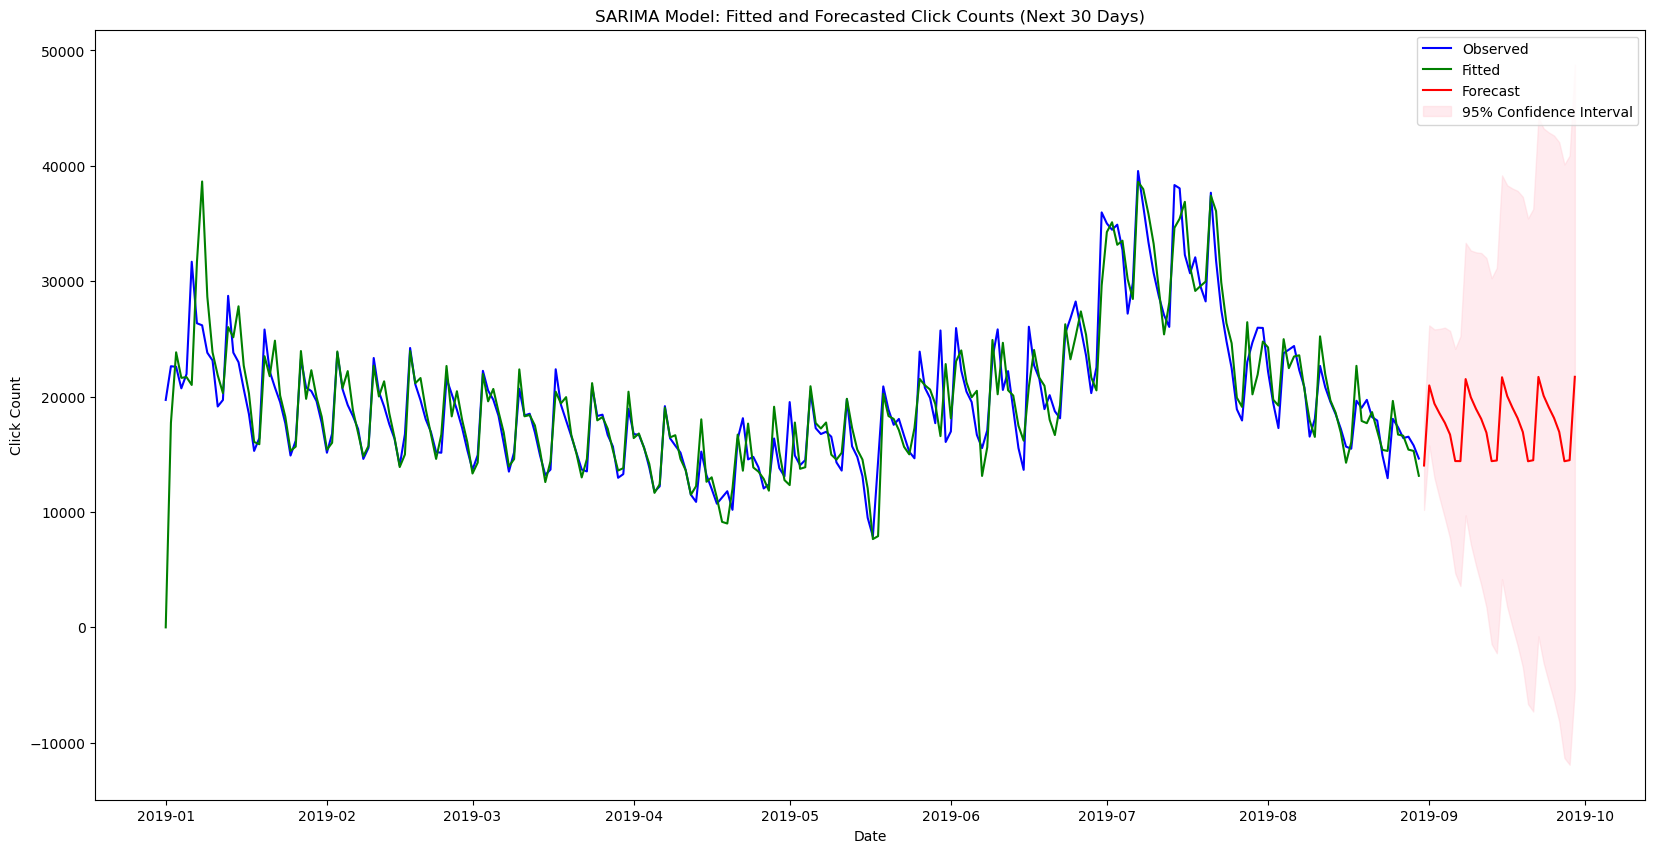

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings("ignore")  # Ignore warnings for clearer output

# Load the data (adjust the file path if needed)
file_path_1 = "clicks.csv"
clicks = pd.read_csv(file_path_1)

# Convert 'date_ymd' to datetime and set it as the DataFrame index
clicks['date'] = pd.to_datetime(clicks['date_ymd'], format='%Y%m%d')
clicks.set_index('date', inplace=True)

# Quick look at the data
print(clicks.head())

# Plot the observed click counts
plt.figure(figsize=(20,10))
plt.plot(clicks.index, clicks['click_count'], label='Observed Click Count', color='blue')
plt.xlabel("Date")
plt.ylabel("Click Count")
plt.title("History of Click Counts, Year 2019")
plt.legend()
plt.show()

# Fit the SARIMA model
# Non-seasonal order: (p, d, q) and seasonal order: (P, D, Q, m)
# Here, seasonal_order=(1, 1, 1, 7) assumes a weekly seasonality for daily data.
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 7)
sarima_model = SARIMAX(clicks['click_count'], order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit(disp=False)
print(sarima_result.summary())

# Add in-sample fitted values to the DataFrame
clicks['fitted'] = sarima_result.fittedvalues

# Forecast for the next 30 days
forecast_steps = 30
forecast_object = sarima_result.get_forecast(steps=forecast_steps)
forecast_df = forecast_object.summary_frame(alpha=0.05)  # 95% confidence interval

# Create a datetime index for the forecast period (assuming daily frequency)
last_date = clicks.index[-1]
forecast_dates = pd.date_range(start=last_date + dt.timedelta(days=1), periods=forecast_steps, freq='D')
forecast_df.index = forecast_dates

# Plot the observed values, in-sample fitted values, and the 30-day forecast
plt.figure(figsize=(20,10))
plt.plot(clicks.index, clicks['click_count'], label='Observed', color='blue')
plt.plot(clicks.index, clicks['fitted'], label='Fitted', color='green')
plt.plot(forecast_df.index, forecast_df['mean'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, 
                 forecast_df['mean_ci_lower'], 
                 forecast_df['mean_ci_upper'],
                 color='pink', 
                 alpha=0.3, 
                 label='95% Confidence Interval')
plt.xlabel("Date")
plt.ylabel("Click Count")
plt.title("SARIMA Model: Fitted and Forecasted Click Counts (Next 30 Days)")
plt.legend()
plt.show()


# Moving Average Analysis

            date_ymd  click_count
date                             
2019-01-01  20190101        19712
2019-01-02  20190102        22632
2019-01-03  20190103        22579
2019-01-04  20190104        20716
2019-01-05  20190105        21953


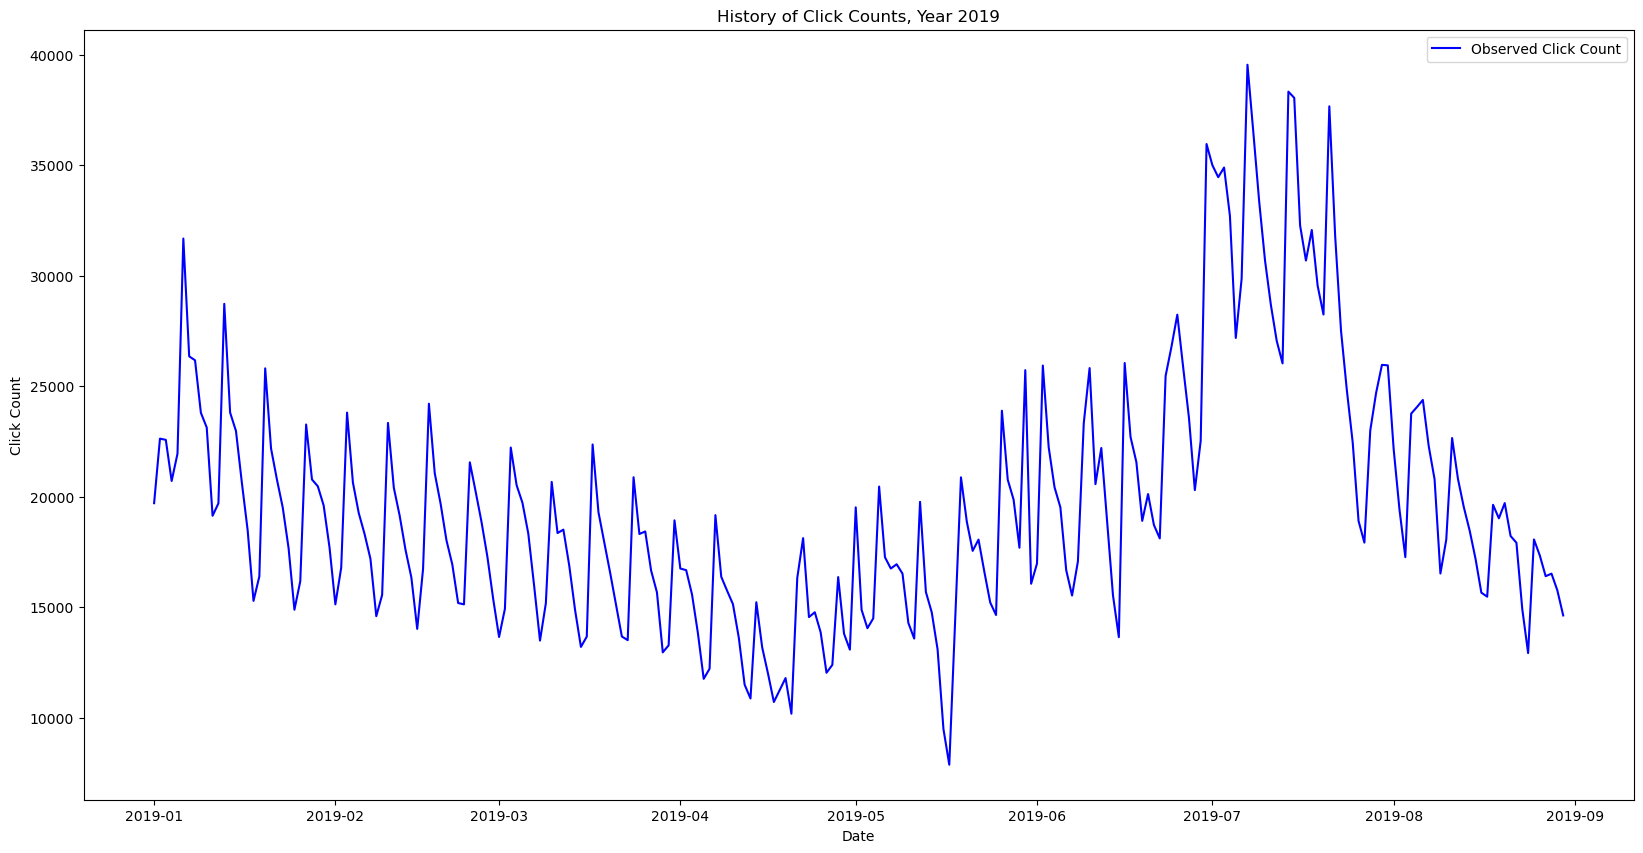

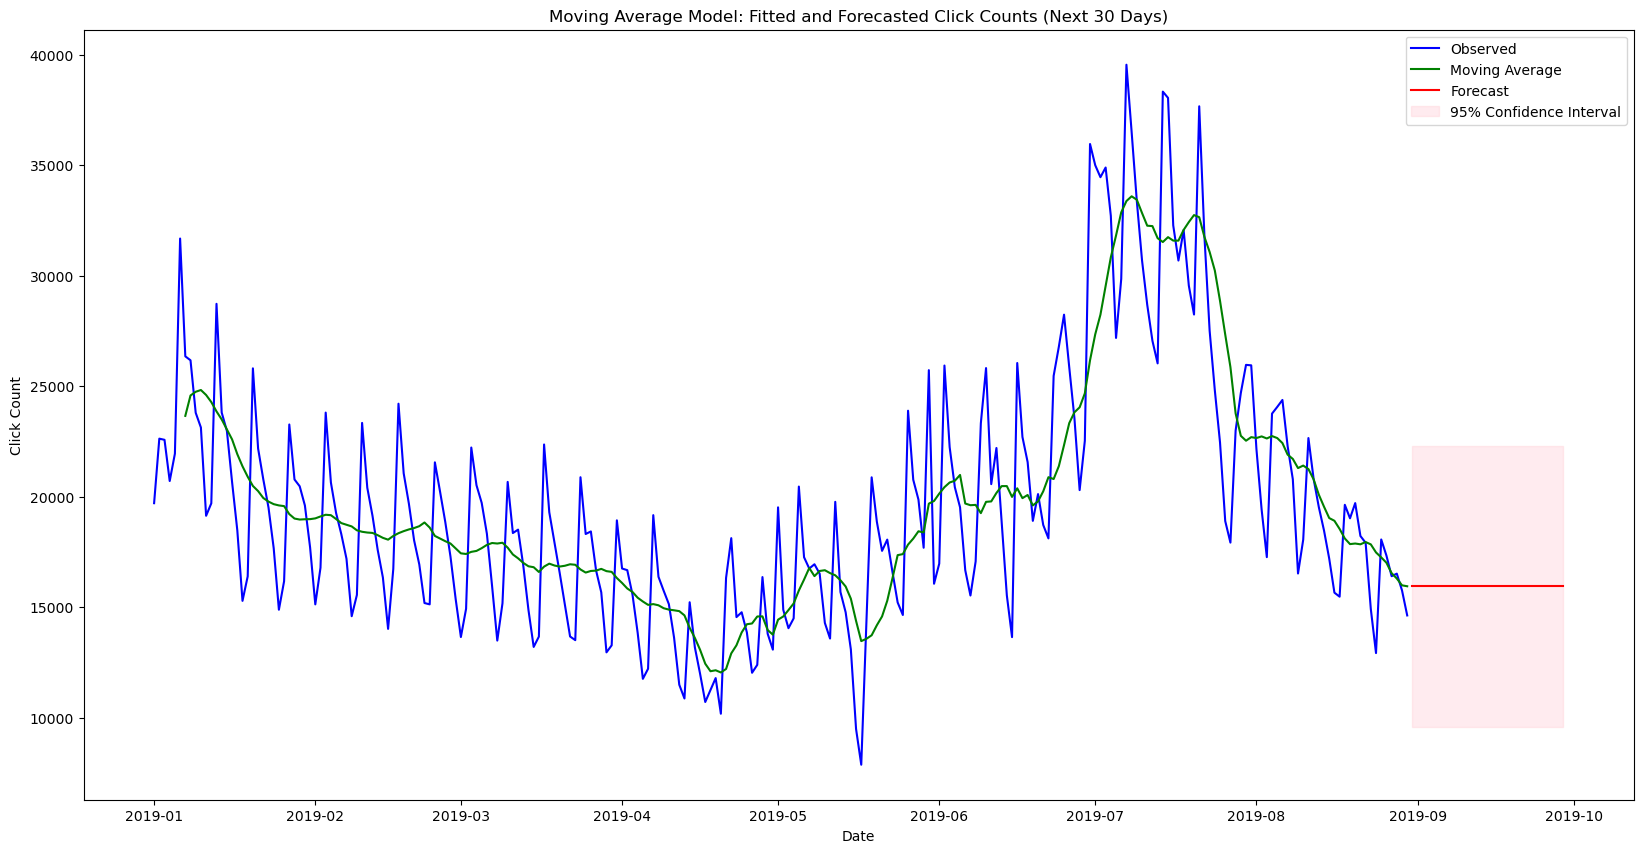

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import warnings

warnings.filterwarnings("ignore")  # Ignore warnings for clearer output

# Load the data (adjust the file path if needed)
file_path_1 = "clicks.csv"
clicks = pd.read_csv(file_path_1)

# Convert 'date_ymd' to datetime and set it as the DataFrame index
clicks['date'] = pd.to_datetime(clicks['date_ymd'], format='%Y%m%d')
clicks.set_index('date', inplace=True)

# Quick look at the data
print(clicks.head())

# Plot the observed click counts
plt.figure(figsize=(20,10))
plt.plot(clicks.index, clicks['click_count'], label='Observed Click Count', color='blue')
plt.xlabel("Date")
plt.ylabel("Click Count")
plt.title("History of Click Counts, Year 2019")
plt.legend()
plt.show()

# --- Moving Average Model ---

# Define a rolling window (e.g., 7 days)
window = 7

# Compute the moving average (fitted values)
clicks['moving_avg'] = clicks['click_count'].rolling(window=window).mean()

# Calculate residuals (only valid where the moving average is computed)
clicks['residuals'] = clicks['click_count'] - clicks['moving_avg']

# Estimate the standard deviation of the residuals (ignoring NaN from the beginning)
std_resid = clicks['residuals'].std()

# For forecasting, assume that the best forecast for each future period is 
# the last moving average value available from the observed period.
forecast_steps = 30
last_moving_avg = clicks['moving_avg'].iloc[-1]

# Create an array for the forecasted values (constant forecast)
forecast_values = np.full(forecast_steps, last_moving_avg)

# Build a 95% confidence interval based on the residual std (using 1.96 as the multiplier)
ci_lower = forecast_values - 1.96 * std_resid
ci_upper = forecast_values + 1.96 * std_resid

# Create a datetime index for the forecast period (assuming daily frequency)
last_date = clicks.index[-1]
forecast_dates = pd.date_range(start=last_date + dt.timedelta(days=1), periods=forecast_steps, freq='D')

# Create a forecast DataFrame for clarity
forecast_df = pd.DataFrame({
    'forecast': forecast_values,
    'lower_ci': ci_lower,
    'upper_ci': ci_upper
}, index=forecast_dates)

# Plot the observed values, the moving average fitted values, and the forecast period
plt.figure(figsize=(20,10))
plt.plot(clicks.index, clicks['click_count'], label='Observed', color='blue')
plt.plot(clicks.index, clicks['moving_avg'], label='Moving Average', color='green')
plt.plot(forecast_df.index, forecast_df['forecast'], label='Forecast', color='red')
plt.fill_between(
    forecast_df.index, 
    forecast_df['lower_ci'], 
    forecast_df['upper_ci'],
    color='pink', 
    alpha=0.3, 
    label='95% Confidence Interval'
)
plt.xlabel("Date")
plt.ylabel("Click Count")
plt.title("Moving Average Model: Fitted and Forecasted Click Counts (Next 30 Days)")
plt.legend()
plt.show()


# LSTM Analysis

            date_ymd  click_count
date                             
2019-01-01  20190101        19712
2019-01-02  20190102        22632
2019-01-03  20190103        22579
2019-01-04  20190104        20716
2019-01-05  20190105        21953


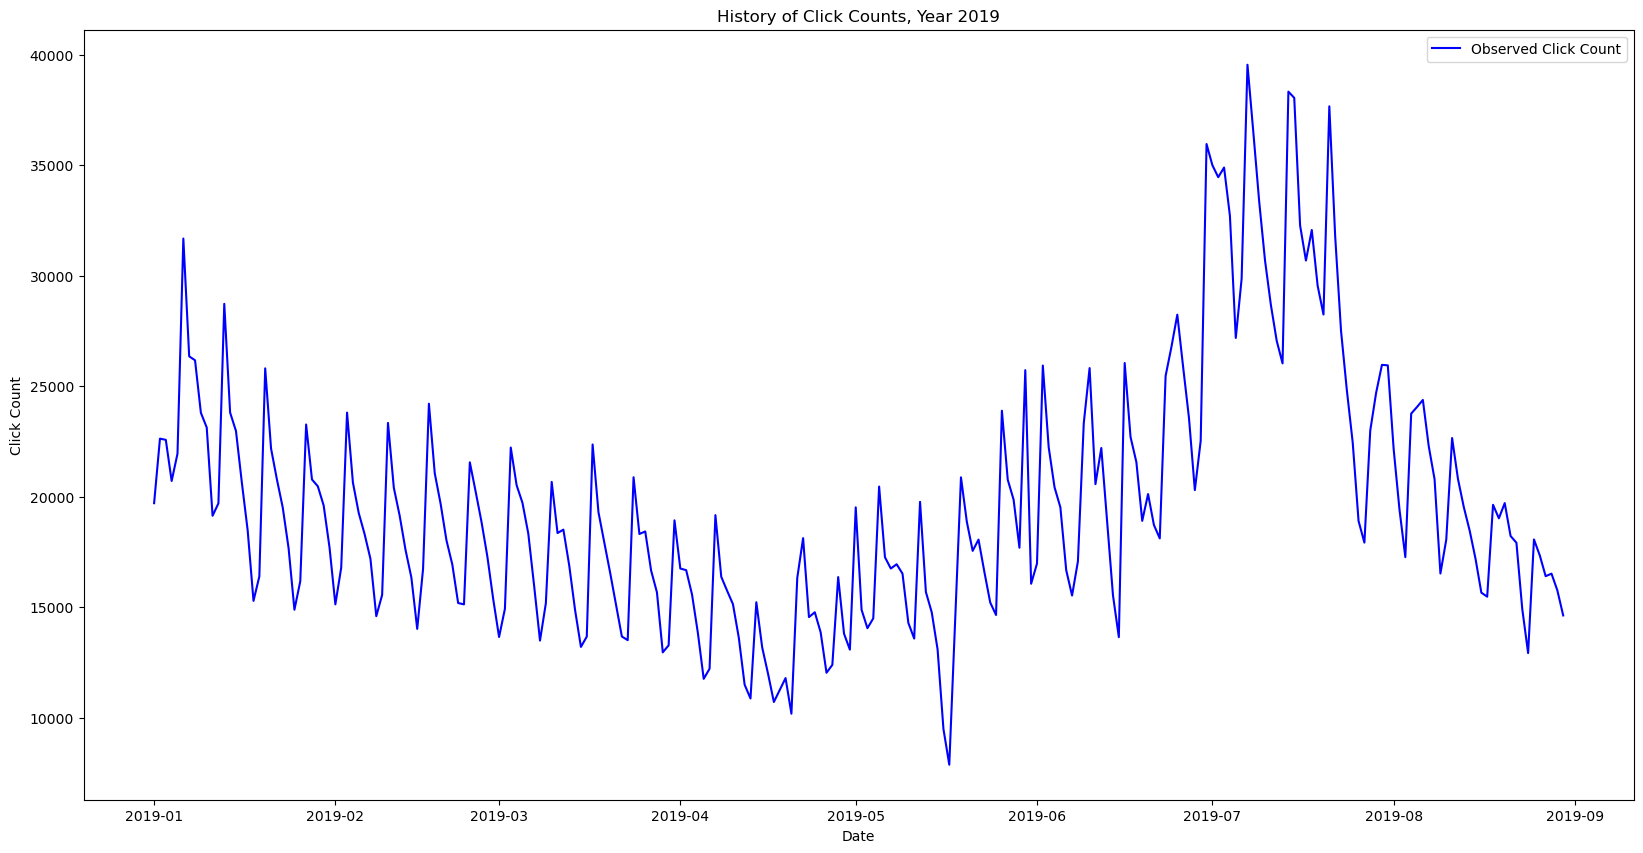

Epoch 1/50
8/8 [==============================] - 1s 3ms/step - loss: 0.1846
Epoch 2/50
8/8 [==============================] - 0s 3ms/step - loss: 0.1332
Epoch 3/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0915
Epoch 4/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 5/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0257
Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0206
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0198
Epoch 8/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 9/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 10/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 11/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 12/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 13/50
8/8 [==============================] - 0s 2ms/step - loss: 0.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")  # Ignore warnings for clearer output

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# -----------------------
# 1. Data Loading & Preprocessing
# -----------------------

# Load the data (adjust file path if needed)
file_path_1 = "clicks.csv"
clicks = pd.read_csv(file_path_1)

# Convert 'date_ymd' to datetime and set it as the DataFrame index
clicks['date'] = pd.to_datetime(clicks['date_ymd'], format='%Y%m%d')
clicks.set_index('date', inplace=True)

# Quick look at the data
print(clicks.head())

# Plot the observed click counts
plt.figure(figsize=(20, 10))
plt.plot(clicks.index, clicks['click_count'], label='Observed Click Count', color='blue')
plt.xlabel("Date")
plt.ylabel("Click Count")
plt.title("History of Click Counts, Year 2019")
plt.legend()
plt.show()

# -----------------------
# 2. Prepare Data for LSTM
# -----------------------

# Extract the 'click_count' series and reshape for scaling
data = clicks['click_count'].values.reshape(-1, 1)

# Scale the data to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create sequences: using the past 'look_back' days to predict the next value
def create_sequences(dataset, look_back):
    X, y = [], []
    for i in range(look_back, len(dataset)):
        X.append(dataset[i - look_back:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

look_back = 7  # using the last 7 days as input
X, y = create_sequences(data_scaled, look_back)

# Reshape input to be [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# -----------------------
# 3. Build and Train the LSTM Model
# -----------------------

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=50, batch_size=32, verbose=1)

# -----------------------
# 4. In-Sample Fitting (Fitted Values)
# -----------------------

# Predict on the training sequences to get the fitted values
train_predict = model.predict(X)
train_predict_rescaled = scaler.inverse_transform(train_predict)

# The fitted values correspond to the dates after the first 'look_back' observations
fitted_index = clicks.index[look_back:]
fitted_series = pd.Series(train_predict_rescaled.flatten(), index=fitted_index)

# -----------------------
# 5. Forecasting the Next 30 Days
# -----------------------

forecast_steps = 30
forecast = []

# Start with the last 'look_back' days from the scaled dataset
last_sequence = data_scaled[-look_back:]
last_sequence = last_sequence.reshape(1, look_back, 1)

# Generate forecasts one step at a time in a recursive manner
for i in range(forecast_steps):
    pred = model.predict(last_sequence)
    forecast.append(pred[0, 0])
    # Update the sequence: drop the first time step and append the new prediction
    new_seq = np.append(last_sequence[0, 1:, 0], pred[0, 0])
    last_sequence = new_seq.reshape(1, look_back, 1)

forecast_rescaled = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Create a datetime index for the forecast period (assuming daily frequency)
last_date = clicks.index[-1]
forecast_dates = pd.date_range(start=last_date + dt.timedelta(days=1), periods=forecast_steps, freq='D')
forecast_series = pd.Series(forecast_rescaled.flatten(), index=forecast_dates)


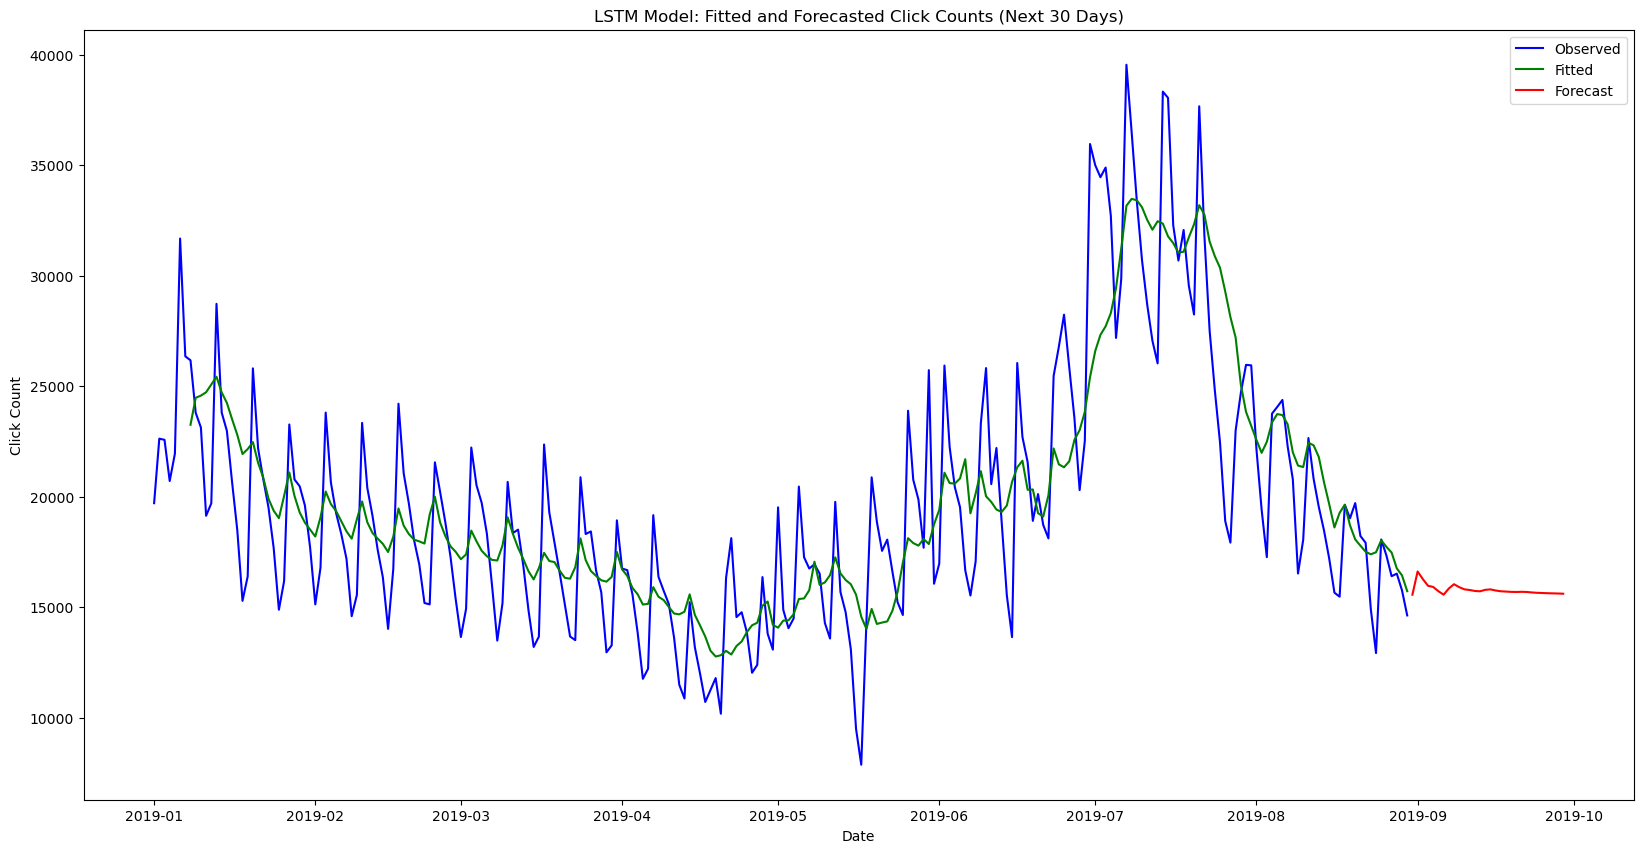

In [5]:
# -----------------------
# Plot the Results: Observed, Fitted, and Forecasted Values
# -----------------------

plt.figure(figsize=(20, 10))
plt.plot(clicks.index, clicks['click_count'], label='Observed', color='blue')
plt.plot(fitted_series.index, fitted_series, label='Fitted', color='green')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red')
plt.xlabel("Date")
plt.ylabel("Click Count")
plt.title("LSTM Model: Fitted and Forecasted Click Counts (Next 30 Days)")
plt.legend()
plt.show()